In [ ]:
!python -m pip install opencv-python

In [ ]:
!pip install pytesseract

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import configparser
import os

In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'
# pytersseract 설치경로 설정해주어야 함

In [ ]:
# # 4버전이랑 3버전이랑 코드가 다름
# OpenCV 4.x
# contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
# OpenCV 3.x
# _, contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
# opencv 기본코드들

# 이미지 불러오기 
img_color = cv.imread('test.png')

# 이미지 흑백전환
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

# 임계점 설정(threshold)
ret, img_binary = cv.threshold(img_gray, 127, 255, 0)

# Contours 추출
contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# Contours 박스 그리기
for cnt in contours:
    cv.drawContours(img_color, [cnt], 0, (255, 0, 0), 3)  # blue


# 이미지 보여주기와 아웃은 같이 써야 jupyter notebook kernel 이 터지지 않음    
# 이미지 보여주기
cv.imshow("result1", img_color)

# 이미지 아웃
cv.waitKey(0)

# 이미지에서 특정 직선 좌표 찾기
cv.HoughLinesP(image, rho, theta, threshod, minLineLength, MaxLineGap)

# 이미지 선분 그리기
# 호프변환에서 얻은 좌표를 다음 line함수에 대입
# start/end point의 좌표는 (x,y)형식 color=BGR(0,0,0)~(255,255,255)
cv.line(img, start_point, end_point, color, thickness)

# # # 이거 뭔지 모르겠다
# for cnt in contours:
#     area = cv.contourArea(cnt)
#     print(area)

In [ ]:
# 연습 - 이미지도 같이 첨부하겠음
img_color = cv.imread('square.png')
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
ret, img_binary = cv.threshold(img_gray, 127, 255, 0)
contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)


for cnt in contours:
    cv.drawContours(img_color, [cnt], 0, (255, 0, 0), 3)  # blue

cv.imshow("result", img_color)

cv.waitKey(0)


for cnt in contours:

    epsilon = 0.02 * cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, epsilon, True)
    print( len(approx))

    cv.drawContours(img_color,[approx],0,(0,255,255),5)


cv.imshow("result", img_color)

cv.waitKey(0)

In [ ]:
# 다시 정리 시작
# 이미지 전처리 절차
# 이미지 입력 -> RGB-GRAY 변환 -> MorphGradienr(경계 이미지 추출)
# -> Adaptrive Trheshold(잡영제거) -> MoprhClose(작은 구멍을 메우고 경계 강화)
# -> Long Line Remove(글씨 추출에 방해되는 요소 제거) -> Contour추출

In [ ]:
# 절차 변경
# 이미지 입력 -> Long Line Remove -> RGB-Gray변환 -> MorphGradiner
# -> Adaptive Threshold -> MorphClose -> Contour추출(최종 글자 인식 부분)

In [27]:
# 이미지 입력
filename = 'test.jpg'
image = cv.imread(filename)

In [44]:
# Long Line Remove(글씨 추출에 방해되는 요소 제거)
# edges = cv.Canny(erosion, 50,150, apertureSize=5)
# dst = image.copy()
# lines = cv.HoughLines(edges, 0.8,np.pi/180,150,srn=100)
# stn=200,min_theta=0,max_theta=np.pi
filename = 'test.jpg'
image = cv.imread(filename)
# 이미지 새로 불러오지 않으면 계속 덮어서 그림 - 자동함수만들때는 주석처리해줘야함

edges = cv.Canny(image, 50, 200,apertureSize=3)
minLineLength = 100 # 1000
maxLineGap = 80 # 60

# for i in lines:
#     rho, theta = i[0][0], i[0][1]
#     a,b = np.cos(theta), np.sin(theta)
#     x0,y0 = a*rho, b*rho

#     scale = image.shape[0] + image.shape[1]

#     x1 = int(x0 + scale*-b)
#     y1 = int(y0 + scale*a)
#     x2 = int(x0 + scale*-b)
#     y2 = int(y0 + scale*a)
    
#     cv.line(dst, (x1,y1),(x2,y2),(0,0,255),2)


lines = cv.HoughLinesP(edges,1,np.pi/360,100,minLineLength,maxLineGap)
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
#         print(x1,y1,x2,y2)
#         gapy = y2 - y1
#         gapx = x2 - x1
#         if(gapy > 0):
        cv.line(image,(x1,y1),(x2,y2),(255,255,255),10)
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_line.jpg', image)

True

In [3]:
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_line.jpg', image)

True

In [ ]:
cv.imshow('img1',image)
cv.waitKey(0)
cv.destroyAllWindows()
# 선제거는 더 보완이 필요

In [28]:
# RGB - Gray 변환
img2gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# global
ret, mask = cv.threshold(img2gray, 127,255,cv.THRESH_BINARY)

# mean
th2 = cv.adaptiveThreshold(img2gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 2)

image_final = cv.bitwise_and(img2gray, img2gray, mask=mask)

new_img = th2
# ret, new_img = cv.threshold(image_final, 127,255,cv.THRESH_BINARY)

In [37]:
# Morph Gradient(경계 이미지 추출)
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(5,3))

dilation = cv.dilate(new_img, kernel, iterations=1)
erosion = cv.erode(new_img,kernel, iterations=3)
result = cv.morphologyEx(image, cv.MORPH_GRADIENT, kernel)

In [ ]:
cv.imshow('result', result)
cv.waitKey()

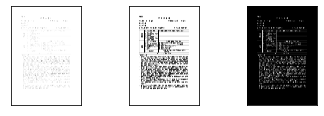

In [38]:
# 이미지 확인 작업
images = [dilation, erosion, result]
for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

In [39]:
for i in range(3):
    cv.imwrite('C:\\Users\\JSW\\temp_memory\\test{}.jpg'.format(i), images[i])

In [ ]:
# Adaptrive Trheshold(잡영제거)

In [ ]:
# MoprhClose(작은 구멍을 메우고 경계 강화)

In [ ]:
# Contour추출
contours, hierarchy = cv.findContours(erosion, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

In [ ]:
# Contour 부분 박스쳐서 이미지 인식 부분 확인하기
for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 35 and h < 35:
            continue

        # draw rectangle around contour on original image
        cv.rectangle(image, (x, y), (x + w, y + h), (255, 0, 255), 2)

In [ ]:
cv.imshow('captcha_result', image)
cv.waitKey()

In [ ]:
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test.jpg', image)

In [ ]:
result2 = 255 - cv.bitwise_and(dilation, mask)
data = pytesseract.image_to_string(result, lang='kor',config='--psm 6')
print(data)

In [ ]:
data = pytesseract.image_to_string(image, lang='kor', config='--psm 6')
print(data)

In [22]:
# 이미지 입력
filename = 'eng_test.jpg'
image = cv.imread(filename)

In [15]:
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
lower = np.array([0, 0, 218])
upper = np.array([157, 54, 255])
mask = cv.inRange(hsv, lower, upper)

In [16]:
th2 = cv.adaptiveThreshold(mask, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 2)
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_th_mean.jpg', th2)

True

In [17]:
# test
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_mask.jpg', mask)

True

In [18]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5,3))
dilate = cv.dilate(mask, kernel, iterations=5)
erosion = cv.erode(mask, kernel, iterations=7)

In [19]:
cnts = cv.findContours(dilate, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    ar = w / float(h)
    if ar < 5:
        cv.drawContours(dilate, [c], -1, (0,0,0), -1)

In [20]:
# test
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_dilate_2.jpg', dilate)
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_erosion.jpg', erosion)

True

In [23]:
# Bitwise dilated image with mask, invert, then OCR
result = 255 - cv.bitwise_and(dilate, mask)
data = pytesseract.image_to_string(result, lang='eng',config='--psm 6')
print(data)
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_result.jpg', result)

All women become
like their mothers.
That is their tragedy.
No man does.

That's his.

OSCAR WILDE



True

In [ ]:
# 그러니까 원본이미지에서 hsv를 통해서 색깔을 맞춰서 다 흑백으로 맞춘다
# 흑백으로 맞춘거에서 dilate를 통해서 하얀부분을 다뭉갠다
# 그리고 적절한 함수 설정을 통해서 findcoutours, 글자가 아닌것으로 생각되는 부분 삭제
# 그러면 이제 뭉개진부분에서 남는 하얀부분들이 글자부분
# 그거를 mask 원본 마스크를 통해서 겹치는 하얀부분 - 즉, 글자 부분만 나온다
# 하양(255)이 글자라서 인식을 못하니까 255에서 빼줘서 검정색으로 나오게한다
# 그러면 이미지에서 글자부분만 검출이 되니까 이거를 tesseract로 읽으면 된다


In [23]:
# 이미지 입력
filename = 'test.jpg'
image = cv.imread(filename)

In [4]:
# RGB - Gray 변환
img2gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_2gray.jpg', img2gray)

True

In [5]:
sample = 255 - img2gray
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_sample.jpg', sample)

True

In [6]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5,3))
dilate = cv.dilate(sample, kernel, iterations=5)
erosion = cv.erode(sample, kernel, iterations=7)

In [7]:
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_dilate_2_kr.jpg', dilate)
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_erosion_kr.jpg', erosion)

True

In [8]:
cnts = cv.findContours(dilate, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    ar = w / float(h)
    if ar < 2:
        cv.drawContours(dilate, [c], -1, (0,0,0), -1)
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_dilate_kr.jpg', dilate)

True

In [10]:
result = 255 - cv.bitwise_and(dilate, sample)
data = pytesseract.image_to_string(result, lang='kor',config='--psm 4')
print(data)
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_result_kr.jpg', result)

스1138

사건번호                             [담당재판부        (단독)부]
원고(채권자)
피고(채무자)
사건에 관하여 아래와 __ 피고(채무자)        주소를 보정합니다.
상대방의 주소가 변동되지 경우에는 주소변동 없음란의 _ “\” 표시를
새로운 주소를              주민등록표초본 _ 소명자료와 __법원에

바랍니다.(상대방의 주소가 변동되지 않은 경우에도 주민등록표초본 등 소명자료 제출요함)
법인 대표자의 주소로 송달장소를 보정할 경우에는 주소변동 있음란의 [」에 “"\” 표시와

함께 새로운 송달장소를         서면을 대표자의 주민등록표 초본 등의 소명자료와
함께 법원에 제출하시기
상대방이 종전에 적어        그대로 거주하고 있으면 재송달신청란의 _ㅎ“\"
서면을 주민등록표 초본 _ 소명자료와 함께 법원에 제출하시기
폐문부재 등으로 송달되지 않는      특별송달(집행관송달 또는
때에는 특별송달신청란의 _ "\” 표시를 하고, 통합송달
휴일송달 중 희망하는 란의 []에도 “<” 표시를 _ 후, 、_ 서면을 주민등록표

소명자료와 함께 법원에 제출하시기 바랍니다(특별송달에 필요한 송달료 추가납부
와 관련된 문의는 재판부 또는 접수계로 하시기 바랍니다).

 

 

통합송달은 채권자가 복수의 송달방법(주간송달, 야간송달 _ 휴일송달)을      신청할
수 있는 집행관송달 방식을 말합니다.
공시송달을 신청하는 때에는 공시송달신청란의 _ "\” 표시를      주민등록말소자등

본 기타 공시송달요건을 소명하는 자료를 첨부하여 제출하시기
지급명령신청사건의 경우에는 사건번호의 "(차)', "채권자", "채무자" 표시에 ㅇ표를 하시기

바랍니다.

또는 동주민센터           또는 주소보정권고 등 법원에서 발행한
상대방의 주민등록표       교부를 신청할 _ 있습니다(주민등록법

제2항 제2호,     시행령 제47조 제5항 참조).



True

In [24]:
# 원본 이미지
data = pytesseract.image_to_string(image, lang='kor',config='--psm 4')
print(data)
# 표 부분 제대로 안나옴

^ ㅅ 1138
주 소 보 정 서

사 건 번 호 _20 가 ( 차 ) [ 담 당 재 판 부 : 제 _ ( 단 독 ) 부 ]
원 고 ( 채 권 자 )

피 고 ( 채 무 자 )

위 사 건 에 관 하 여 아 래 와 같 이 피 고 ( 채 무 자 ) 의 주 소 를 보 정 합 니 다 .

주 소 변 동 없 음 종 전 에 적 어 낸 주 소 에 그 대 로 거 주 하 고 있 음
] 주 소

( 주 민 등 록 상 주 소 가

변 동

] 송 달 장 소

( 주 민 등 록 상 주 소는

변 동 없 음 )

 

 

 

재 송 달 신 청 종 전 에 적 어 낸 주 소 로 송 달

 

 

 

노 그 주 ㅜ 2~
. . 통 합 송 달 ( 주 간 + 야 간 + 휴 일 ) [ ㄴ ] 주 간 송 달
트 벽 소 다 시 칭

^ 곤 ㅇ 곤 77 ㅇ

소다 ㅎ 이 ] 소다
( 특 별 송 달 료 는 지 역 에 | 느 다 득 흑 릉 . . . : . . . 니 가 열 응 롱
따 라 차 이 가 있 을 수 | 느 흠 꼬 에 적 이루 7 소도 승 맘
있 음 ) 새 로 운 주 소 로 숭 덜
송 달 장 소 로 송 달

 

 

 

 

 

즈 ㅅ ”제 0 、 -

공 시 송 달 신 청 주 소 를 할 수 없 흔 르 로 공 시 송 탈 을 친 청 할

ㅇ 으 른 00 (처 넘 서 근 . )
1그 l : .

원 고 0 ㅇ ㅇ )

 

 

[ 주 소 보 정 요 령 ]

1. 상 대 방 의 주 소 가 변 동 되 지 않 은 경 우 에 는 주 소 변 동 없 음 란 의 | 에 “\"” 표 시 를 하 고 , 송 달
이 가 능 한 새 로 운 주 소 가 확 인 되 는 경 우 에 는 주 소 변 동 있 음 란 의 [] 에 “《” 표 시 와 함 께
새 로 운 주 소 를 적 은 후 이 서 면 을 주 민 등 록 표 초 본 등 소 명 자 료 와 함 께 법 원 에 제 출 하 시기
바 랍 니 다 .( 상 대 방 의 주 소 가 변 동 되 지 않 은 경 우 에 도 주 민 등 록 표 초 본 등 소 명 자 료 제 출 요 함 )

In [25]:
print(data.replace(" ", ""))

^ㅅ1138
주소보정서

사건번호_20가(차)[담당재판부:제_(단독)부]
원고(채권자)

피고(채무자)

위사건에관하여아래와같이피고(채무자)의주소를보정합니다.

주소변동없음종전에적어낸주소에그대로거주하고있음
]주소

(주민등록상주소가

변동

]송달장소

(주민등록상주소는

변동없음)







재송달신청종전에적어낸주소로송달







노그주ㅜ2~
..통합송달(주간+야간+휴일)[ㄴ]주간송달
트벽소다시칭

^곤ㅇ곤77ㅇ

소다ㅎ이]소다
(특별송달료는지역에|느다득흑릉...:...니가열응롱
따라차이가있을수|느흠꼬에적이루7소도승맘
있음)새로운주소로숭덜
송달장소로송달











즈ㅅ”제0、-

공시송달신청주소를할수없흔르로공시송탈을친청할

ㅇ으른00(처넘서근.)
1그l:.

원고0ㅇㅇ)





[주소보정요령]

1.상대방의주소가변동되지않은경우에는주소변동없음란의|에“\"”표시를하고,송달
이가능한새로운주소가확인되는경우에는주소변동있음란의[]에“《”표시와함께
새로운주소를적은후이서면을주민등록표초본등소명자료와함께법원에제출하시기
바랍니다.(상대방의주소가변동되지않은경우에도주민등록표초본등소명자료제출요함)

2.법인대표자의주소로송달장소를보정할경우에는주소변동있음란의[|]에“"\”표시와
함께새로운송달장소를적은후이서면을대표자의주민등록표초본등의소명자료와
함께법원에제출하시기바랍니다.

3.상대방이종전에적어낸주소에그대로거주하고있으면재송달신청란의[]에“"\"”표시
를하여이서면을주민등록표초본등소명자료와함께법원에제출하시기바랍니다.

4.수취인부재,폐문부재등으로송달되지않는경우에특별송달(집행관송달또는법원경위송
달)을희망하는때에는특별송달신청란의[|에“\”표시를하고,통합송달ㆍ주간송달ㆍ야
간송달ㆍ휴일송달중희망하는란의[]에도“\”표시를한후,이서면을주민등록표초
본등의소명자료와함께법원에제출하시기바랍니다(특별송달에필요한송달료추가납부
와관련된문의는재판부또는접수계로하시기바랍니다).

5.통합송달은채권자가복수의송달방법(주간송달,야간송달및휴일송달)을한번에신청할
수있는집행관송달방식을말합니다.

6.공시송달을신청하는때

In [26]:
# gray-scale 이미지
# RGB - Gray 변환
img2gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_2gray.jpg', img2gray)

data = pytesseract.image_to_string(img2gray, lang='kor',config='--psm 4')
print(data)
# 이거는 딱히 차이 없음

스1138
주소보정서

사건번호 20 가 (차)               [담당재판부 : 제 _ (단독)부]
원고(채권자)
피고(채무자)
위 사건에 관하여 아래와 같이 피고(채무자)          의 주소를 보정합니다.

주소변동 없음     종전에 적어낸 주소에 그대로 거주하고 있음
「 주소
(주민등록상 주소가
변동
[|] 송달장소
(주민등록상 주소는

변동 없음)

 

 

 

재송달신청              종전에 적어낸 주소로 송달

 

 

 

오그 수             =           2
~>툰      통합송달(주간+야간+휴일) ㄴ] 주간송달
트벽소다시처

-1 는 ㅇ 른 1 ㅇ

소다                  호이 소다
(특별송달료는 지역에[는 앞득으르... 니 아월오도
따라 차이가 있을 수| 느 을모영 고이고 7 소도 승병
있음)                체포순 우로 승는
송달장소로 송달

 

 

 

 

 

스      소          소  으   기공
공시송달신청            주소를 알 수 없으므로 공시송달을 신청함
ㅇ   ㅇㅇ 른 ^ 느^ㅇ               (첨부서류  .                     )

침부서류 :

원고 00<ㅇ

 

 

[주소보정요령]

1. 상대방의 주소가 변동되지 않은 경우에는 주소변동 없음란의 |」]에 "\” 표시를 하고, 송달
이 가능한 새로운 주소가 확인되는 경우에는 주소변동 있음란의 [|」에 “"\” 표시와 함께
새로운 주소를 적은 후 이 서면을 주민등록표초본 등 소명자료와 함께 법원에 제출하시기
바랍니다.(상대방의 주소가 변동되지 않은 경우에도 주민등록표초본 등 소명자료 제출요함)

2. 법인 대표자의 주소로 송달장소를 보정할 경우에는 주소변동 있음란의 (에 "\” 표시와
함께 새로운 송달장소를 적은 후 이 서면을 대표자의 주민등록표 초본 등의 소명자료와
함께 법원에 제출하시기 바랍니다.

3. 상대방이 종전에 적어 낸 주소에 그대로 거주하

In [81]:
# 이거는 호프라인 변환 적용 - 표 부분 제거 - 이게 제일 괜찮음
filename = 'test.jpg'
image = cv.imread(filename)
copy_image = image
# 이미지 새로 불러오지 않으면 계속 덮어서 그림 - 자동함수만들때는 주석처리해줘야함

edges = cv.Canny(image, 50, 200,apertureSize=3)
minLineLength = 100
maxLineGap = 80

lines = cv.HoughLinesP(edges,1,np.pi/360,100,minLineLength,maxLineGap)
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv.line(copy_image,(x1,y1),(x2,y2),(255,255,255),10)
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_line.jpg', copy_image)

data = pytesseract.image_to_string(copy_image, lang='kor',config='--psm 4')
print(data)

스1138
주 소보정서

 

 

 

 

 

 

 

 

 

 

 

 

 

사건번호 _20 가 (차)                  [담당재판부 : 제 _ (단독)부]
원고(채권자)
피고(채무자)
위 사건에 관하여 아래와 같이 피고(채무자)          의 주소를 보정합니다.
|                        ㅣ                        =
| ㅁ 주소변동 없음     종전에 적어낸 주소에 그대로 거주하고 있음
' 주소
주소 변 (주민등록상 주소가
변동 _ 동 | 변동)
. ㅠ무 . 있 송달장소
음 (주민등록상 주소는
변동 없음)
 』 | 재송달신청            종전에 적어낸 주소로 송달
               스오   ;         =
날      트벼소난시청 니 똥합송달(주간+야간+휴일) [ 주간송달
론 다 그 은0 6 가이     야간송달                [| 휴일송달
소다  그 (특별송달료는 지역에 _ 고        즈   소
신청. 곤 파라 차이가 있을 수 는 입속 / 그 도 그공츠 으8
이 요 있음)            에포폭 이조 6 들
ㄴㄴ! < 곤 ㅇ   ㅇㅇ 폰
"              (첨부서류 :                 )
                     20 . . . 원고 ㅇ000

[주소보정요령 |

1. 상대방의 주소가 변동되지 않은 경우에는 주소변동 없음란의 [| 」에 "\”” 표시를 하고, 송달
이 가능한 새로운 주소가 확인되는 경우에는 주소변동 있음란의 []에 "\” 표시와 함께
새로운 주소를 적은 후 이 서면을 주민등록표초본 등 소명자료와 함께 법원에 제출하시기
바랍니다.(상대방의 주소가 변동되지 않은 경우에도 주민등록표초본 등 소명자료 제출요함)

2. 법인 대표자의 주소로 송달장소를 보정할 경우에는 주소변동 있음란의 |]에 "\” 표시와
함께 새로운 송달장소를 적은 후 이 서면을 대표자의 주민등록표 초본 등의 소명자료와
함께 법원에 

In [90]:
print(len(data))

1726


In [91]:
f = open("testfile.txt", 'w')
f.write(data)
f.close()

In [89]:
doc = pattern1.sub(' ',
              re.sub(r' {2,}','',
              pattern4.sub('',data.strip('\n'))))
print(doc)

스1138
주 소보정서

 

 

 

 

 

 

 

 

 

 

 

 

 

사건번호  20 가  차  담당재판부   제    단독 부 
원고 채권자 
피고 채무자 
위 사건에 관하여 아래와 같이 피고 채무자 의 주소를 보정합니다 
 ㅣ 
  ㅁ 주소변동 없음종전에 적어낸 주소에 그대로 거주하고 있음
  주소
주소 변  주민등록상 주소가
변동   동   변동 
  ㅠ무   있 송달장소
음  주민등록상 주소는
변동 없음 
     재송달신청종전에 적어낸 주소로 송달
스오  
날트벼소난시청 니 똥합송달 주간 야간 휴일    주간송달
론 다 그 은0 6 가이야간송달   휴일송달
소다그  특별송달료는 지역에   고즈소
신청  곤 파라 차이가 있을 수 는 입속   그 도 그공츠 으8
이 요 있음 에포폭 이조 6 들
ㄴㄴ    곤     폰
  첨부서류   
20       원고  000

 주소보정요령  

1  상대방의 주소가 변동되지 않은 경우에는 주소변동 없음란의     에   ”” 표시를 하고  송달
이 가능한 새로운 주소가 확인되는 경우에는 주소변동 있음란의   에   ” 표시와 함께
새로운 주소를 적은 후 이 서면을 주민등록표초본 등 소명자료와 함께 법원에 제출하시기
바랍니다  상대방의 주소가 변동되지 않은 경우에도 주민등록표초본 등 소명자료 제출요함 

2  법인 대표자의 주소로 송달장소를 보정할 경우에는 주소변동 있음란의   에   ” 표시와
함께 새로운 송달장소를 적은 후 이 서면을 대표자의 주민등록표 초본 등의 소명자료와
함께 법원에 제출하시기 바랍니다 

3  상대방이 총전에 적어 낸 주소에 그대로 거주하고 있으면 재송달신청란의     에     표시
를 하여 이 서면을 주민등록표 초본 등 소명자료와 함께 법원에 제출하시기 바랍니다 

4  수취인부재  폐문부재 등으로 송달되지 않는 경우에 특별송달 집행관송달 또는 법원경위숭
달 을 희망하는 때에는 특별송달신청란의   에   ” 표시를 하고  통합송달 주간송달 야
간송달 휴일송달 중

In [47]:
print(data.replace("\n",""))

스1138주 소보정서             사건번호 _20 가 (차)                  [담당재판부 : 제 _ (단독)부]원고(채권자)피고(채무자)위 사건에 관하여 아래와 같이 피고(채무자)          의 주소를 보정합니다.|                        ㅣ                        =| ㅁ 주소변동 없음     종전에 적어낸 주소에 그대로 거주하고 있음' 주소주소 변 (주민등록상 주소가변동 _ 동 | 변동). ㅠ무 . 있 송달장소음 (주민등록상 주소는변동 없음) 』 | 재송달신청            종전에 적어낸 주소로 송달               스오   ;         =날      트벼소난시청 니 똥합송달(주간+야간+휴일) [ 주간송달론 다 그 은0 6 가이     야간송달                [| 휴일송달소다  그 (특별송달료는 지역에 _ 고        즈   소신청. 곤 파라 차이가 있을 수 는 입속 / 그 도 그공츠 으8이 요 있음)            에포폭 이조 6 들ㄴㄴ! < 곤 ㅇ   ㅇㅇ 폰"              (첨부서류 :                 )                     20 . . . 원고 ㅇ000[주소보정요령 |1. 상대방의 주소가 변동되지 않은 경우에는 주소변동 없음란의 [| 」에 "\”” 표시를 하고, 송달이 가능한 새로운 주소가 확인되는 경우에는 주소변동 있음란의 []에 "\” 표시와 함께새로운 주소를 적은 후 이 서면을 주민등록표초본 등 소명자료와 함께 법원에 제출하시기바랍니다.(상대방의 주소가 변동되지 않은 경우에도 주민등록표초본 등 소명자료 제출요함)2. 법인 대표자의 주소로 송달장소를 보정할 경우에는 주소변동 있음란의 |]에 "\” 표시와함께 새로운 송달장소를 적은 후 이 서면을 대표자의 주민등록표 초본 등의 소명자료와함께 법원에 제출하시기 바랍니다.3. 상대방이 총전에 적어 낸 주소에 그대로 거주하고 있으면 재송달신청란의 [| ]에 "\

In [72]:
filename = 'test.jpg'
image = cv.imread(filename)
copy_image = image

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
dilate = cv.dilate(copy_image, kernel, iterations=1)
erosion = cv.erode(dilate, kernel, iterations=1)
result = cv.morphologyEx(copy_image, cv.MORPH_GRADIENT, kernel)

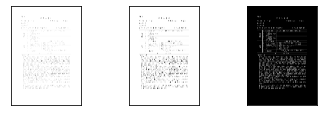

In [73]:
# 이미지 확인 작업
images = [dilation, erosion, result]
for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

In [74]:
for i in range(3):
    cv.imwrite('C:\\Users\\JSW\\temp_memory\\test{}.jpg'.format(i), images[i])

In [76]:
# Bitwise dilated image with mask, invert, then OCR
result = cv.bitwise_and(dilate, erosion)
data = pytesseract.image_to_string(result, lang='kor',config='--psm 4')
print(data)
cv.imwrite('C:\\Users\\JSW\\temp_memory\\test_result.jpg', result)

^ㅅ1138
보 정서

사건번호 20 가 (차)          담당재판부 : 제 _ (단독)부|
원고(채권자)
피고(채무자)
위 사건에 관하여 아래와 같이 피고(채무자)          의 주소를 보정합니다

소면동 없음     중진에 적어낸 주소에 그대로 거주하고 있음

스 2
| -1-
스트] 느 로 시- -스 2, |.
(| 민등독싱  소기
에
변동)
1~ㄴ|-"]- 2
ㄴㄴ 0 *ㅠ =->1!

ㅅㅅ  ㄴ  。_
(-  마| - 58 싱  ~ 수 극

"~ 없음)

- 재송날신청        종전에 적어낸 주수

통합송단(주간+ 야간+ 휴일)
-                        야간송딘

는 느 0 -   스나 시 징
(5별송단835 지역아[ 는 아탁홍단
= <    쇠ㅇ
[다 다 가이 가 있을     6 간에?   기니 1
@] 으-              새로운 ㅜㅠ  、, 나느 -2-
^ㅅ1!               으나 장 쇼번 날

-스 2, 드 @ㅇ12 27~ 어   그 는 ~ 그지 2] - 46] - 으-  시 지하
고 시 소날 시 짐                   ㅣ -1-1 ; 은   |   14 으브로   @   |8        시 실 임
1 느 그                    -/.] }    는그  .
(쥐부서듀 :                       )

위고 0) 0)

 

너 쥬소보정요령

상대방의 주소가 변동되지 않은 경우에는 주소변동 없음란의 _.에 “^” 표시를 하고, 송달
이 가능한 새로운 운 주소가 확인되는 경우에는 주소변동 있음란의 에 “\" 표시와 함께
새로운 주소를 적은 후 이 서면을 주민등록표초본 등 '소명자료와 함께 멤원에 제출하시기
마람니다.(상대방의 주소가 변동되지 않은 경우에도 주민등록표초본 등 소명자료 제출요함)

2. 법인 대표자의 주소로 송달장소를 보정할 경우에는 주 소번동 있음란의 _에 “"\/"” 퓨시와
함께 새로운 송달장소를 적은 후 이 서면을 대표자의 주민등록표 초

True

In [77]:
import re
from string import punctuation

In [85]:
pattern1 = re.compile('[{}■「※」ㆍ√☎㎡□○◦㎥･◆￦￭▸▣❒❙♣◇←－：…………☞≫≪Ⅰ《》〈〉∨…➀Ⅲ➁‣⇨➂∙▪ⓛ‣Ⅱ․․․▲△Ｏ•×【】▶✓➡◀∼″→ㅇ⇒『』◯▼㎜×·④①②③⑤⑦⑥⑧⑨⑩⑪⑫⑬⑭⑮⑯⑰⑱｢｣◎❶❷❸❹❼❺❻]'.format(re.escape(punctuation)))
pattern2 = re.compile(r'\bwww\w+(?:[.]?\w+)+\b')
pattern3 = re.compile(r'[A-Za-z一-龥0-9]')
pattern4 = re.compile(r'\s{2,}')

In [ ]:
# - todo
# tesseract 분명히 글꼴 추가 누적 학습이 있을거임
# 글꼴 통일하거나 글꼴 추가해서 누적 학습
# 선제거 다시한번하기
# 전처리 더 철저하게